In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r"D:\udemy\Ml\data\Flight_Price_resources/Data_Train.xlsx")

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data['Total_Stops'].isnull().sum()

np.int64(0)

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
def change_into_date_time(col):
    data[col] = pd.to_datetime(data[col])

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_date_time(feature)

In [20]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [21]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [22]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [23]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [24]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-26 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-26 05:50:00,2025-06-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-26 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-06-26 18:05:00,2025-06-26 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-06-26 16:50:00,2025-06-26 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [25]:
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_min"] = df[col].dt.minute
    return df.head(3)

In [26]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-26 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-26 05:50:00,2025-06-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-26 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [27]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-26 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-26 05:50:00,2025-06-26 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-26 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [28]:
cols_to_drop = ["Arrival_Time","Dep_Time"]
data.drop(cols_to_drop,axis=1, inplace=True)

In [29]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [30]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


#Data Analysis

In [31]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<12):
        return "Morning"
    elif(x>12) and (x<16):
        return "Noon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

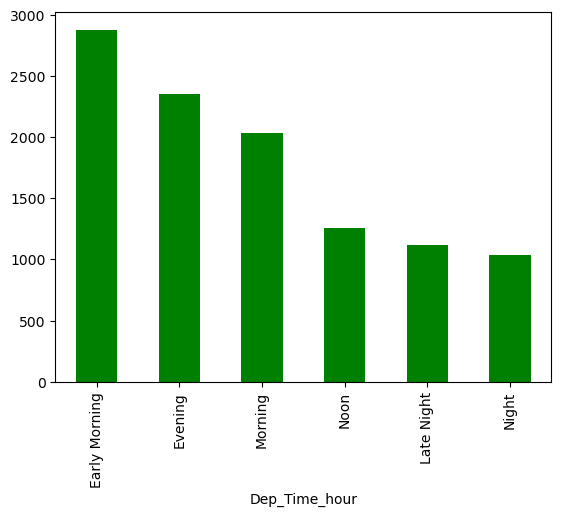

In [32]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar", color="g")

In [33]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [34]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [35]:
# data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [36]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [37]:
def preprocess_duration(x):
    if 'h' not in x:
       x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [38]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [39]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25


In [40]:
data["Duration"][0]

'2h 50m'

In [41]:
int('2h 50m'.split(' ')[0][0:-1])


2

In [42]:
int('2h 50m'.split(' ')[1][0:-1])


50

In [43]:
data['Duration_hour'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
data['Duration_minute'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [44]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [45]:
data["Duration"] 

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
eval('2*60')

120

In [47]:
data['Duration_Total_mins'] =  data["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [48]:
data['Duration_Total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Total_mins, Length: 10682, dtype: int64

In [49]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins'],
      dtype='object')

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

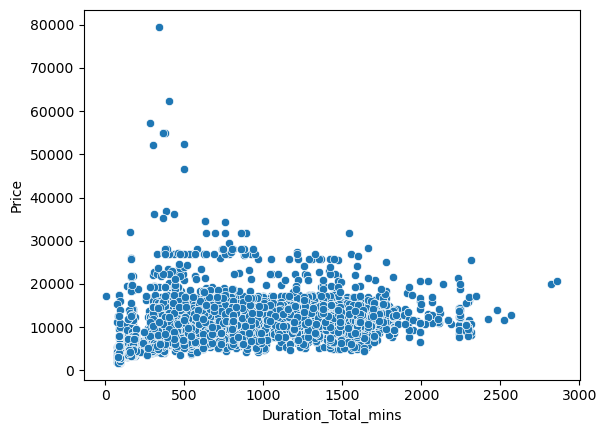

In [50]:
sns.scatterplot(x="Duration_Total_mins", y="Price", data=data)

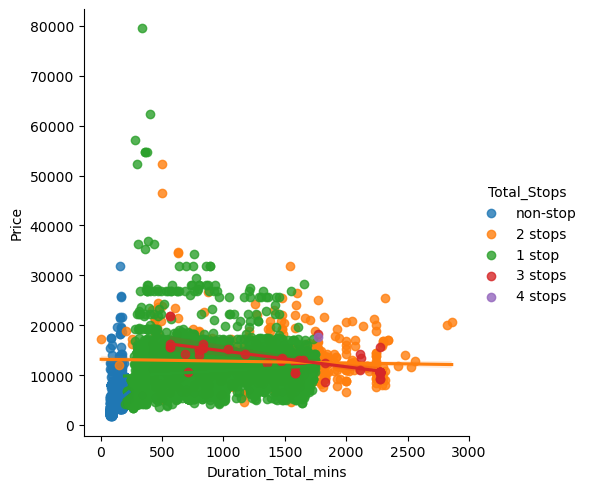

In [51]:
sns.lmplot(x="Duration_Total_mins", y="Price", hue="Total_Stops", data=data)

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

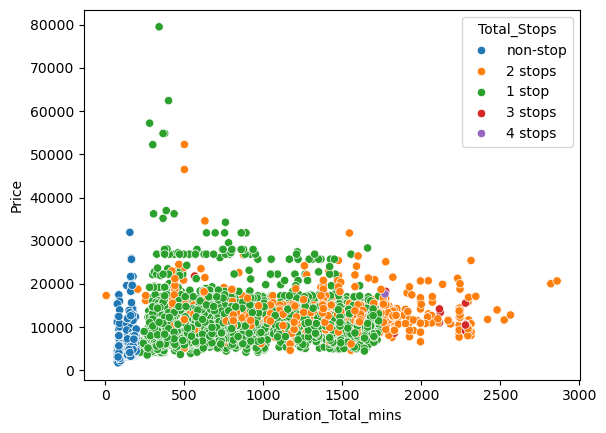

In [52]:
sns.scatterplot(x="Duration_Total_mins", y="Price", hue="Total_Stops", data=data)

# Bi-Variant Analysis

In [53]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

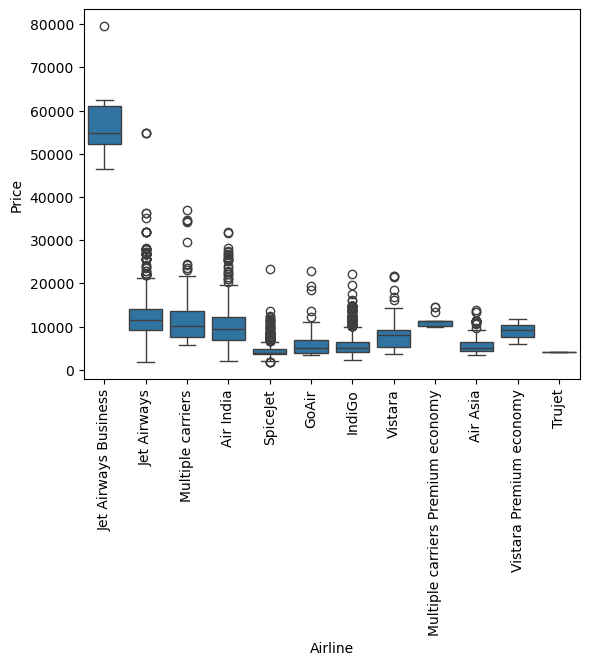

In [54]:
sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical')

# onehot encoding

In [55]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140


In [56]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins'],
      dtype='object')

In [57]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [58]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [59]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [60]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

# onehot encoding scratch coding

In [61]:
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x: 1 if x==sub_category else 0)

In [62]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


In [63]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [64]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [65]:
data['Airline'].nunique()

12

In [66]:
data.groupby(["Airline"])["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [67]:
airlines = data.groupby(["Airline"])["Price"].mean().sort_values().index

In [68]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}
    

In [69]:
dict_airlines
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [70]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [71]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [72]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [73]:
data["Destination"]

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10682, dtype: object

In [74]:
data["Destination"] = data["Destination"].replace('New Delhi', 'Delhi')

In [75]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [76]:
dest = data.groupby(["Destination"])["Price"].mean().sort_values().index

In [77]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [78]:
dict_destination = {key:index for index, key in enumerate(dest, 0)}


In [79]:
data['Destination'] = data['Destination'].map(dict_destination)

In [80]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [81]:
data.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [82]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [83]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [84]:
stop_dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4 }

In [85]:
 data['Total_Stops'] = data['Total_Stops'].map(stop_dict)

In [86]:
 data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [87]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Duration_Total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [88]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [89]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0


In [90]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_Total_mins','Source','Journey_year','Duration'], axis=1, inplace=True)

In [91]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minute', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [92]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [93]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


# Outlier detection

In [94]:
def plot(df, col):
    fig , (ax1, ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

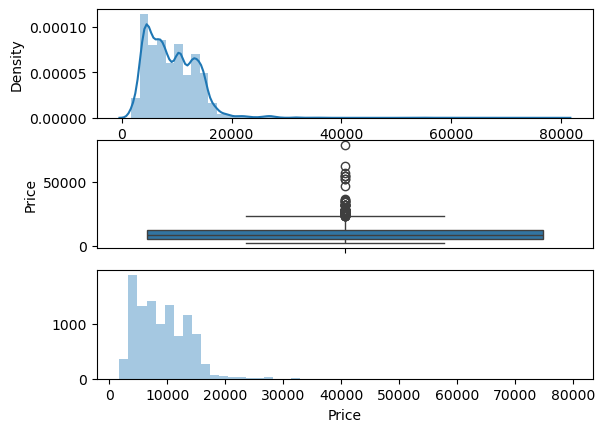

In [95]:
plot(data, 'Price')

In [96]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr =q3 - q1
maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr


In [97]:
print(maximum)

23017.0


In [98]:
print(minimum)

-5367.0


In [99]:
print([price for price in data["Price"] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [100]:
data["Price"] = np.where(data["Price"] >= 35000, data["Price"].median(), data['Price'] )

In [101]:
data.head(20)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0
5,1,3,0,3873.0,24,6,9,0,11,25,2,25,0,1,0,0,0
6,10,2,1,11087.0,12,3,18,55,10,25,15,30,1,0,0,0,0
7,10,2,1,22270.0,1,3,8,0,5,5,21,5,1,0,0,0,0
8,10,2,1,11087.0,12,3,8,55,10,25,25,30,1,0,0,0,0
9,8,4,1,8625.0,27,5,11,25,19,15,7,50,0,0,1,0,0


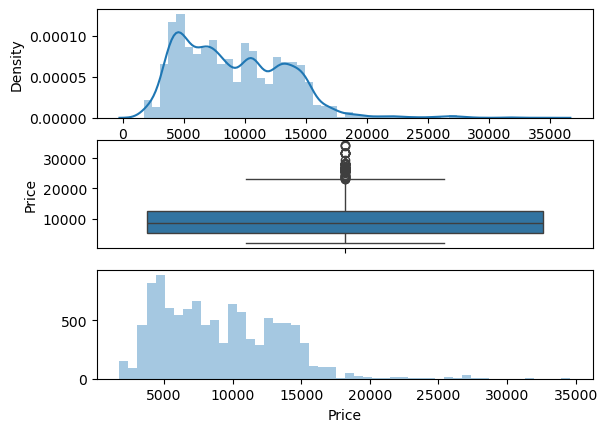

In [102]:
plot(data, "Price")

# feature selection 

In [103]:
X = data.drop(["Price"], axis = 1)

In [104]:
y = data["Price"] 

In [105]:
from sklearn.feature_selection import mutual_info_regression

In [106]:
imp = mutual_info_regression(X, y)

In [107]:
imp

array([1.32542751, 1.06337322, 0.78448085, 0.37349183, 0.62810775,
       0.92708141, 0.75607143, 1.14565258, 0.90126569, 1.12117397,
       0.67277633, 0.38678276, 0.45433767, 0.52243445, 0.12841956,
       0.20257007])

In [108]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [109]:
imp_df

,0
Airline,1.325428
Destination,1.063373
Total_Stops,0.784481
Journey_day,0.373492
Journey_month,0.628108
Dep_Time_hour,0.927081
Dep_Time_min,0.756071
Arrival_Time_hour,1.145653
Arrival_Time_min,0.901266
Duration_hour,1.121174


In [110]:
imp_df.columns = ['importance']

In [111]:
imp_df

,importance
Airline,1.325428
Destination,1.063373
Total_Stops,0.784481
Journey_day,0.373492
Journey_month,0.628108
Dep_Time_hour,0.927081
Dep_Time_min,0.756071
Arrival_Time_hour,1.145653
Arrival_Time_min,0.901266
Duration_hour,1.121174


In [112]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.325428
Arrival_Time_hour,1.145653
Duration_hour,1.121174
Destination,1.063373
Dep_Time_hour,0.927081
Arrival_Time_min,0.901266
Total_Stops,0.784481
Dep_Time_min,0.756071
Duration_minute,0.672776
Journey_month,0.628108


In [113]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state = 42)

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
ml_model = RandomForestRegressor()

In [118]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [119]:
y_pred = ml_model.predict(X_test)

In [120]:
y_pred

array([16905.87,  5402.54,  8924.03, ...,  3482.22,  6130.52,  6870.98],
      shape=(2671,))

In [121]:
from sklearn import metrics

In [122]:
metrics.r2_score(y_test, y_pred)

0.8121323359480845

In [123]:
import pickle

In [124]:
file = open(r"D:\udemy\Ml\data\Flight_Price_resources/rf_random.pkl", 'wb')


In [125]:
pickle.dump(ml_model, file)

In [126]:
model = open(r"D:\udemy\Ml\data\Flight_Price_resources/rf_random.pkl", 'rb')

In [127]:
forest = pickle.load(model)

In [128]:
y_pred2 = forest.predict(X_test)

In [129]:
metrics.r2_score(y_test, y_pred2)

0.8121323359480845

In [130]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100
    
    

In [131]:
mape(y_test, y_pred)

np.float64(13.192175078108049)

In [132]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print(f"Training score : {model.score(X_train, y_train)}")
    y_predection = model.predict(X_test)
    print(f"Predection are: {y_predection}")
    print("\n")
    r2_score = metrics.r2_score(y_test, y_predection)
    print(f"r2 score :{r2_score}")
    print(f"MAE score :{metrics.mean_absolute_error(y_test, y_predection)}")
    print(f"MSE score :{metrics.mean_squared_error(y_test, y_predection)}")
    print(f"RMSE score :{np.sqrt(metrics.mean_squared_error(y_test, y_predection))}")
    print(f"MAPE score :{r2_score}")
    print(f"r2 score :{mape(y_test, y_predection)}")
    sns.displot(y_test-y_predection)
    
    

Training score : 0.9518837559926046
Predection are: [16806.89  5354.79  8777.23 ...  3513.07  6219.24  6929.02]


r2 score :0.8124279403721641
MAE score :1173.0773105914739
MSE score :3651577.7652549003
RMSE score :1910.9101928805812
MAPE score :0.8124279403721641
r2 score :13.163802130568852


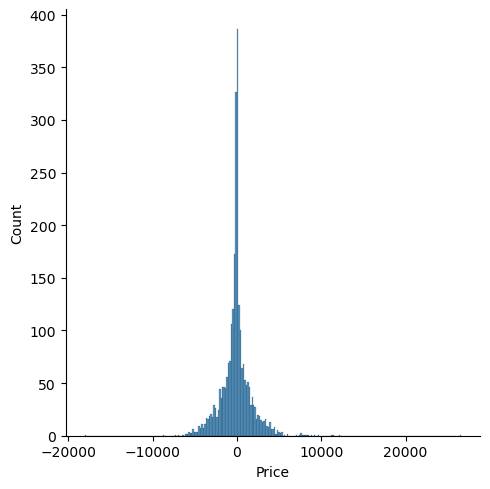

In [133]:
predict(RandomForestRegressor())

In [134]:
from sklearn.tree import DecisionTreeRegressor


Training score : 0.966591628243878
Predection are: [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score :0.6770108067803486
MAE score :1420.600024959441
MSE score :6287824.309860435
RMSE score :2507.5534510475413
MAPE score :0.6770108067803486
r2 score :15.65669630780391


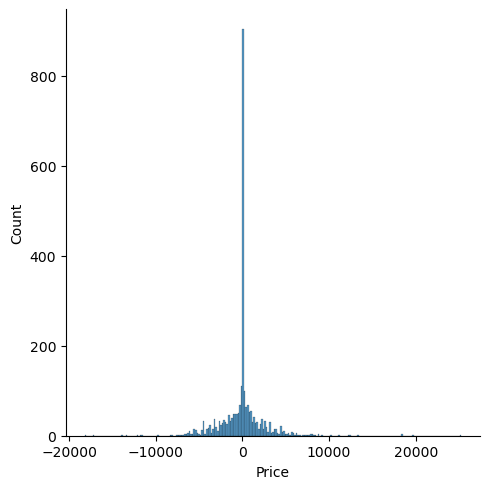

In [135]:
predict(DecisionTreeRegressor())

In [ ]:
RandomForestRegressor()

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
reg_rf = RandomForestRegressor()

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [142]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]
min_samples_split = [5, 10, 15, 100]


In [145]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth' : max_depth,
    'min_samples_split':min_samples_split
    
    
}

In [146]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [150]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs = -1, verbose=2)

In [151]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [152]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=15,
                      n_estimators=540)

In [153]:
rf_random.best_score_

np.float64(0.7926755868191772)

In [ ]:
|